In [24]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [25]:
algo_return_path = Path("Resources/algo_returns.csv")
sp500_history_path = Path("Resources/sp500_history.csv")
whale_return_path = Path("Resources/whale_returns.csv")

In [26]:
algo_return = pd.read_csv(algo_return_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_return = pd.read_csv(whale_return_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [27]:
whale_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [28]:
whale_return.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [29]:
#Dropping nulls
#whale_return.dropna(thresh=1)
#whale_return.dropna(inplace=True)
whale_return.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [30]:
algo_return.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [31]:
algo_return.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [32]:
algo_return.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [33]:
sp500_history.tail()

,Close
Date,
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99
2012-10-02,$1445.75
2012-10-01,$1444.49


In [34]:
sp500_history.dtypes

Close    object
dtype: object

In [35]:
sp500_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [36]:
#Fixing the data type by converting values from object to a float
def convert_currency(val):
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

In [37]:
#Establishing the conversion 
sp500_history['Close'].apply(convert_currency)

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [38]:
#Finalizing the conversion of data
sp500_history['Close'] = sp500_history['Close'].apply(convert_currency)

sp500_history.dtypes

Close    float64
dtype: object

In [39]:
sp500_history['Close']= sp500_history['Close'].pct_change()

In [40]:
sp500_history.dropna()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [41]:
sp500_history.columns = [ 'S&P500']
sp500_history.head()

,S&P500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [42]:
combined_data = pd.concat([sp500_history, algo_return, whale_return], axis="columns", join="inner")
combined_data.head()

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-23,NaN,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837


In [44]:
combined_data.dropna()

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
...,...,...,...,...,...,...,...
2015-03-09,0.017254,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
2015-03-06,-0.003929,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-05,0.014378,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726


<AxesSubplot:xlabel='Date'>

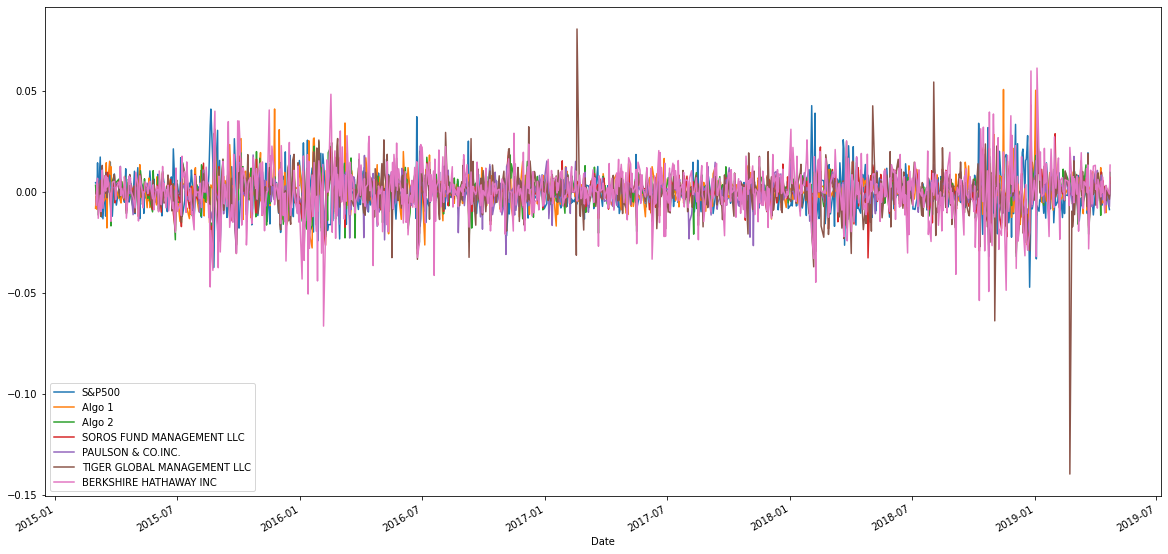

In [46]:
combined_data.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

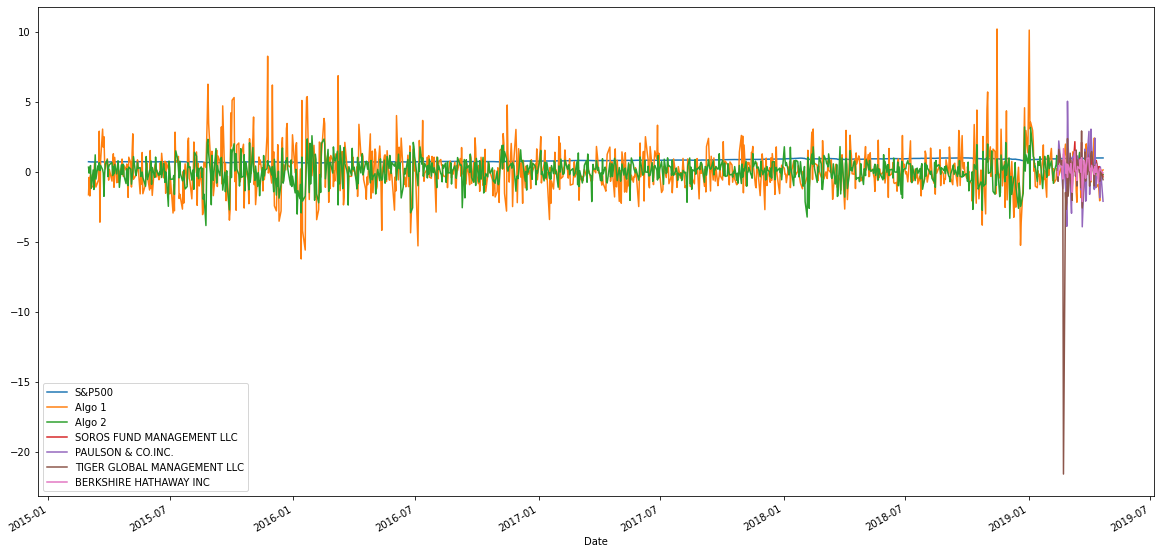

In [92]:
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.plot(figsize=(20,10))

<AxesSubplot:>

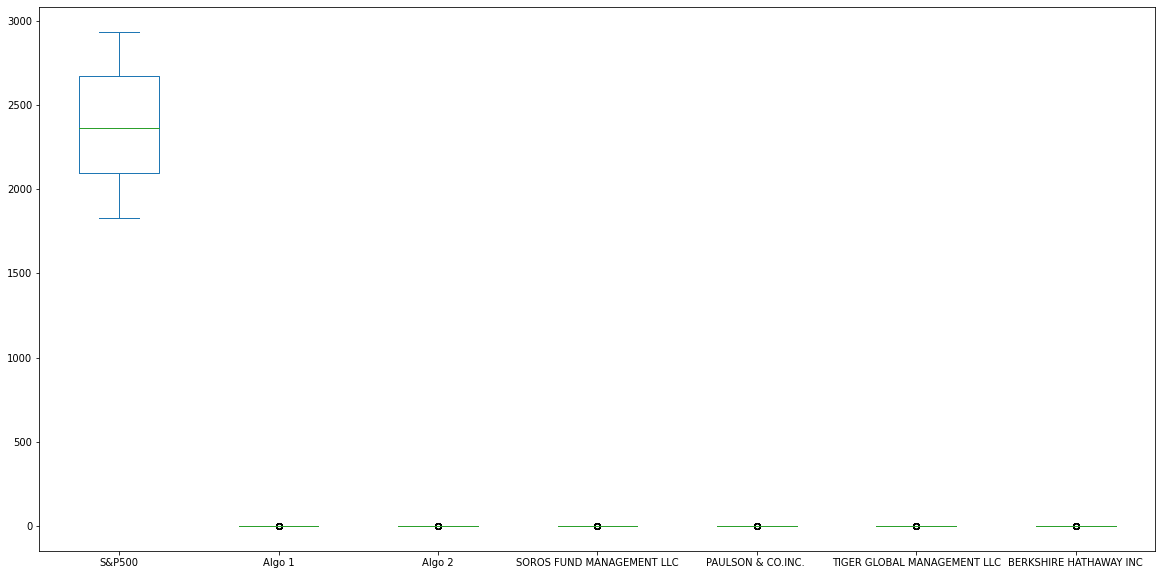

In [94]:
combined_data.plot.box(figsize=(20,10))

In [95]:
daily_std = daily_returns.std()
daily_std.head()

S&P500                          0.008584
Algo 1                         19.235914
Algo 2                       1437.520527
SOROS FUND MANAGEMENT LLC            NaN
PAULSON & CO.INC.                    NaN
dtype: float64

In [99]:
whale_dr = whale_return.pct_change()
whale_std = whale_dr.std()
whale_std.head()

SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
dtype: float64

In [98]:
sp500_dr = sp500_history.pct_change()
sp500_std = sp500_dr.std()
sp500_std.head()

S&P500    0.008135
dtype: float64

In [100]:
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

S&P500                           0.136268
Algo 1                         305.360666
Algo 2                       22819.930910
SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
dtype: float64